In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-score-classification/train.csv
/kaggle/input/credit-score-classification/test.csv


# <p style="background-color:lightgreen;font-family:newtimeroman;font-size:120%;color:black;text-align:center;border-radius:5px 5px;"><b> Credit Score Classification with ANN

# Dataset info: All data with columns 

**ID**: Unique identifier for each entry in the dataset.

**Customer_ID**: Identifier for each customer.

**Month**: Month of data collection.

**Name**: Name of the customer.

**Age**: Age of the customer.

**SSN**: Social Security Number of the customer.

**Occupation**: Occupation of the customer.

**Annual_Income**: Annual income of the customer.

**Monthly_Inhand_Salary**: Monthly salary after deductions.

**Num_Bank_Accounts**: Number of bank accounts the customer has.

**Num_Credit_Card**: Number of credit cards the customer has.

**Interest_Rate**: Interest rate applied on loans.

**Num_of_Loan**: Number of loans the customer has.

**Type_of_Loan**: Type of loan taken by the customer.

**Delay_from_due_date**: Number of days delayed from due date for payments.

**Num_of_Delayed_Payment**: Number of delayed payments made by the customer.

**Changed_Credit_Limit**: Indicates if the credit limit has been changed.

**Num_Credit_Inquiries**: Number of credit inquiries made by the customer.

**Credit_Mix**: Mix of different types of credit accounts held by the customer.

**Outstanding_Debt**: Amount of outstanding debt.

**Credit_Utilization_Ratio**: Ratio of credit used to credit available.

**Credit_History_Age**: Age of credit history.

**Payment_of_Min_Amount**: Indicates if minimum payment amount is met.

**Total_EMI_per_month**: Total Equated Monthly Installment (EMI) paid by the customer.

**Amount_invested_monthly**: Amount invested monthly by the customer.

**Payment_Behaviour**: Payment behavior of the customer.

**Monthly_Balance**: Monthly balance in the account.

**Credit_Score**: Target variable - credit score of the customer.

[](http://https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.usaa.com%2Finet%2Fwc%2Fadvice-finances-the-truth-about-credit-scores&psig=AOvVaw1J1xBsZPyBs28Abu9zS1Kd&ust=1726039110608000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCLihoPfqt4gDFQAAAAAdAAAAABAE)

In [4]:
# import libraries

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = (12, 6)
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


from sklearn.preprocessing import StandardScaler,  OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, log_loss, recall_score, accuracy_score, precision_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import pickle
import re

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.saving import save_model
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2

In [5]:
df = pd.read_csv("/kaggle/input/credit-score-classification/train.csv", low_memory=False)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
# Duplicate check

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")
        
duplicate_values(df)

Duplicate check...
There are no duplicated observations in the dataset.


In [8]:
# check unique values 
for col in df.columns:
    print(df[col].value_counts())
    print("total unique value counts:", len(df[col].value_counts()))
    print("\n")

ID
0x25fb6    1
0x25fb7    1
0x25fb8    1
0x25fb9    1
0x25fba    1
          ..
0x1605     1
0x1606     1
0x1607     1
0x1608     1
0x1609     1
Name: count, Length: 100000, dtype: int64
total unique value counts: 100000


Customer_ID
CUS_0x942c    8
CUS_0xd40     8
CUS_0x21b1    8
CUS_0x2dbc    8
CUS_0xb891    8
             ..
CUS_0x5b48    8
CUS_0xa5f9    8
CUS_0x4d43    8
CUS_0xb95f    8
CUS_0x3edc    8
Name: count, Length: 12500, dtype: int64
total unique value counts: 12500


Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
total unique value counts: 8


Name
Langep              44
Stevex              44
Jessicad            39
Vaughanl            39
Danielz             38
                    ..
Vellacotto           4
Josephine Masonz     4
ra Alperz            4
McBrideq             4
Timothyl             3
Name: count, Length: 10139, dtype: int64
total 

In [9]:
# check multicollinearity

def color_custom(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

In [10]:
pd.DataFrame(df.select_dtypes(include = "number")).corr().style.map(color_custom)

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
Monthly_Inhand_Salary,1.000000,-0.010819,-0.005049,-0.006422,-0.250100,-0.008867,0.173192,0.007264
Num_Bank_Accounts,-0.010819,1.000000,-0.002216,-0.003998,0.015966,-0.001683,-0.001365,-0.001433
Num_Credit_Card,-0.005049,-0.002216,1.000000,-0.004012,0.008715,-0.003479,-0.003341,0.000768
Interest_Rate,-0.006422,-0.003998,-0.004012,1.000000,0.009792,-0.001681,-0.000359,0.002517
Delay_from_due_date,-0.250100,0.015966,0.008715,0.009792,1.000000,0.011508,-0.063796,-0.003889
Num_Credit_Inquiries,-0.008867,-0.001683,-0.003479,-0.001681,0.011508,1.000000,0.000145,-0.007031
Credit_Utilization_Ratio,0.173192,-0.001365,-0.003341,-0.000359,-0.063796,0.000145,1.000000,0.001389
Total_EMI_per_month,0.007264,-0.001433,0.000768,0.002517,-0.003889,-0.007031,0.001389,1.000000


In [11]:
df = df.replace("_", "", regex=True)
df[df.eq('').any(axis=1)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,LowspentMediumvaluepayments,331.2098628537912,Good
8,0x160e,CUS0x21b1,January,Rick Rothackerj,28,004-07-5839,,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,LowspentSmallvaluepayments,470.69062692529184,Standard
10,0x1610,CUS0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,HighspentLargevaluepayments,466.46647639764313,Standard
16,0x161a,CUS0x2dbc,January,Langep,34,486-85-3974,,143162.64,12187.220000,1,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,0x25fdf,CUS0x8600,June,Sarah McBridec,28,031-35-0942,,20002.88,1929.906667,10,...,Bad,3571.7,33.359987,6 Years and 1 Months,Yes,60.964772,74.36660309585342,!@9#%8,307.65929119739087,Standard
99992,0x25fe6,CUS0x942c,January,Nicks,24,078-73-5990,Mechanic,39628.99,3359.415833,4,...,,502.38,32.991333,31 Years and 3 Months,No,35.104023,401.1964806036356,LowspentSmallvaluepayments,189.64108011929028,Poor
99994,0x25fe8,CUS0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,HighspentMediumvaluepayments,410.2561579776419,Poor
99995,0x25fe9,CUS0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,HighspentLargevaluepayments,479.86622816574095,Poor


In [12]:
# Check and Fill empty values with np.nan
empty_values = df[df.eq('').any(axis=1)]

df.loc[empty_values.index] = df.loc[empty_values.index].replace('', np.nan)

In [13]:
df.shape

(100000, 28)

In [14]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

# Exploratory Data Analysis

## Handling missing values

## 1. Age

In [15]:
def non_numeric_values(df, column_name):
    
    # Define a regular expression pattern to match numeric characters
    pattern = r'\D+'
    
    # Find non-numeric values using regular expression
    non_numeric_values = df[column_name].astype(str).str.findall(pattern)
    
    # Flatten the list of lists
    non_numeric_values = [item for sublist in non_numeric_values for item in sublist]
    
    # Use set to ensure uniqueness
    unique_non_numeric_values = set(non_numeric_values)
    
    return unique_non_numeric_values

unique_non_numeric = non_numeric_values(df, 'Age')
print(unique_non_numeric)

{'-'}


In [16]:
def clean_age(age):
    try:
        return int(age)
    except ValueError:
        return None

df['Age'] = df['Age'].str.replace('-', '')
df['Age'] = df['Age'].apply(clean_age)

In [17]:
def truncate_last_two_digits(age):
    if age > 99:
        return age // 100
    else:
        return age


df['Age'] = df['Age'].apply(truncate_last_two_digits)


df.Age

0        23
1        23
2         5
3        23
4        23
         ..
99995    25
99996    25
99997    25
99998    25
99999    25
Name: Age, Length: 100000, dtype: int64

In [18]:
# make age valid for credit score

unvalid_age = np.where(df["Age"] < 18)[0]

In [19]:
# fill with nan unvalid data

df["Age"][unvalid_age] = np.NaN
df.Age.unique()

array([23., nan, 28., 34., 54., 55., 21., 31., 33., 75., 30., 24., 44.,
       45., 40., 41., 32., 35., 36., 39., 37., 20., 46., 26., 42., 19.,
       48., 38., 50., 43., 22., 64., 70., 18., 27., 25., 53., 47., 57.,
       56., 29., 71., 49., 82., 69., 76., 51., 52., 83., 84., 66., 79.,
       68., 60., 73., 63., 74., 78., 72., 81., 65., 67., 86., 61., 85.,
       77., 80., 62., 58., 59., 99., 95.])

In [20]:
mode_age = df.groupby('Customer_ID')["Age"].transform(lambda x: x.mode()[0] 
                                                      if not x.mode().empty 
                                                      else np.nan)
mode_global = df["Age"].mode()[0]

df["Age"] = df["Age"].fillna(mode_age.fillna(mode_global))

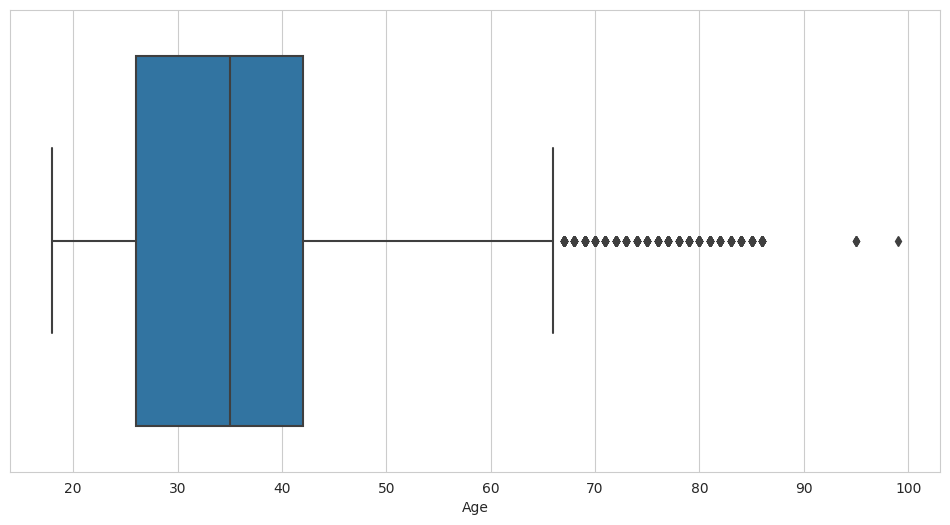

In [21]:
sns.boxplot(df, x= df.Age);

In [22]:
df.Age.isna().sum()

0

## 2. Occupation

In [23]:
df.Occupation.value_counts()

Occupation
Lawyer          6575
Architect       6355
Engineer        6350
Scientist       6299
Mechanic        6291
Accountant      6271
Developer       6235
MediaManager    6232
Teacher         6215
Entrepreneur    6174
Doctor          6087
Journalist      6085
Manager         5973
Musician        5911
Writer          5885
Name: count, dtype: int64

In [24]:
df.Occupation.isna().sum()

7062

In [25]:
mode_occupation = df.groupby('SSN')['Occupation'].transform(lambda x: x.mode()[0] 
                                                            if not x.mode().empty 
                                                            else np.nan)
mode_global = df["Occupation"].mode()[0]

df['Occupation'] = df['Occupation'].fillna(mode_occupation.fillna(mode_global))

In [26]:
df.Occupation.isna().sum()

0

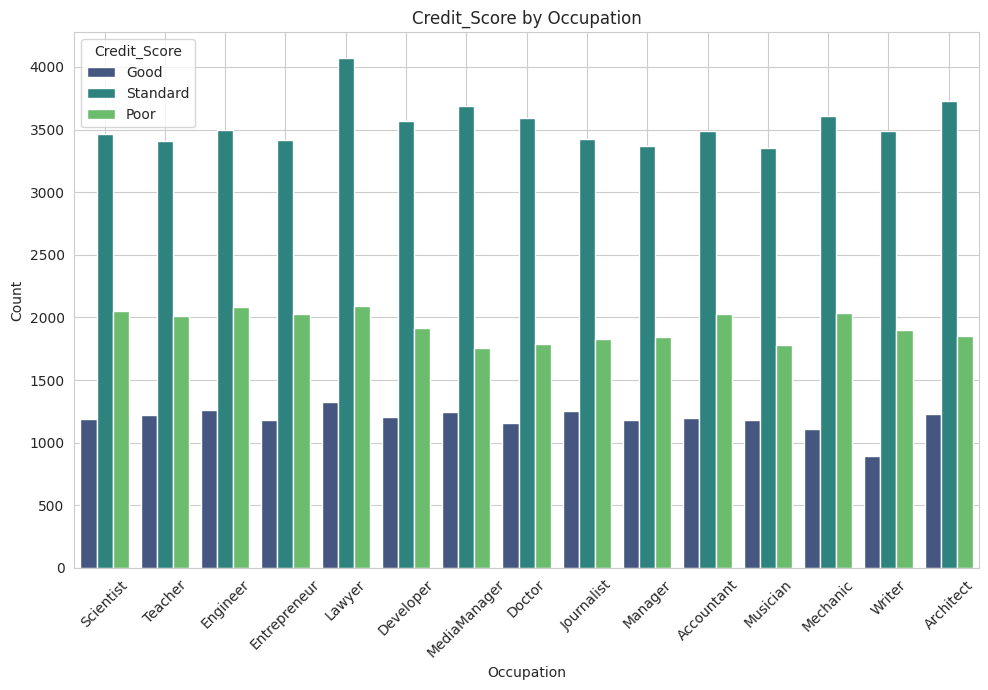

In [27]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Occupation', hue='Credit_Score', data=df, palette="viridis")
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Credit_Score by Occupation')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score')
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Num_Bank_Accounts

In [28]:
non_numeric_values(df, 'Num_Bank_Accounts')

{'-'}

In [29]:
df[df.Num_Bank_Accounts < 0]['Num_Bank_Accounts'].count() # find negative 

21

In [30]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].abs() # change positive

In [31]:
df['Num_Bank_Accounts'].isna().sum()

0

## 4. Num_of_Loan

In [32]:
non_numeric_values(df, 'Num_of_Loan')

{'-'}

In [33]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df[df['Num_of_Loan'] < 0]['Num_of_Loan'].unique() # find negative

array([-100])

In [34]:
df[df['Num_of_Loan'] < 0]['Num_of_Loan'].count() # cannot be negative

3876

In [35]:
df['Num_of_Loan'] = df['Num_of_Loan'].abs() # convert positive

In [36]:
df['Num_of_Loan'].isna().sum()

0

## 5.Type_of_Loan

In [37]:
df.Type_of_Loan.value_counts()[:5]

Type_of_Loan
Not Specified              1408
Credit-Builder Loan        1280
Personal Loan              1272
Debt Consolidation Loan    1264
Student Loan               1240
Name: count, dtype: int64

In [38]:
df['Type_of_Loan'].fillna('Not Specified', inplace=True)

In [39]:
df['Type_of_Loan'].isna().sum()

0

## 6. Delay_from_due_date

In [40]:
non_numeric_values(df, 'Delay_from_due_date')

{'-'}

In [41]:
df.Delay_from_due_date.unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66])

In [42]:
# cannot be negative
df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].unique() 

array([-1, -2, -3, -5, -4])

In [43]:
df['Delay_from_due_date'] = df['Delay_from_due_date'].abs()

In [44]:
df.Delay_from_due_date.isna().sum()

0

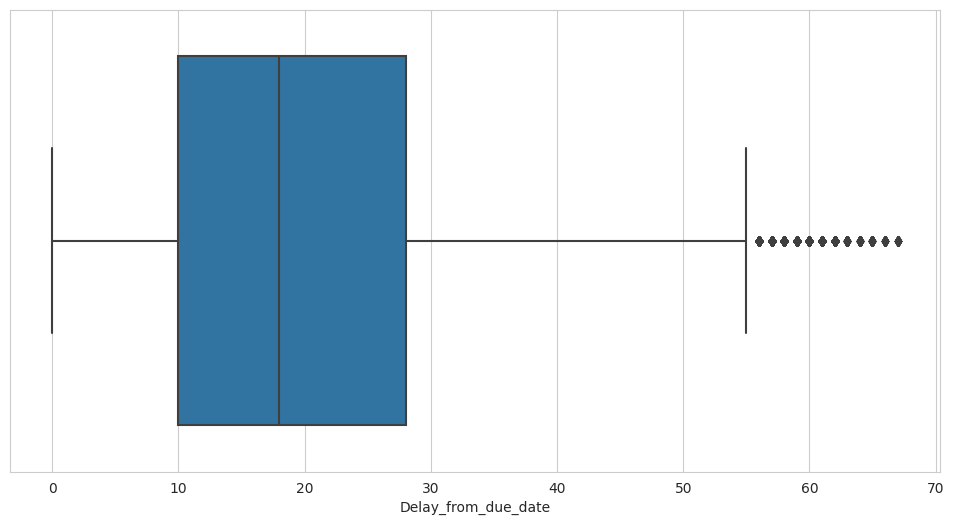

In [45]:
sns.boxplot(data= df, x = df.Delay_from_due_date);

## 7. Num_of_Delayed_Payment

In [46]:
non_numeric_values(df, 'Num_of_Delayed_Payment')

{'-', 'nan'}

In [47]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], 
                                             errors='coerce')
# check negative

df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].unique()

array([-1., -3., -2.])

In [48]:
df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].count()

644

In [49]:
# convert positive
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].abs()

In [50]:
df.Num_of_Delayed_Payment.isna().sum()

7002

In [51]:
Num_of_Delay_fill = df.groupby('Num_of_Delayed_Payment').value_counts().mode().iloc[0]

df['Num_of_Delayed_Payment'].fillna(Num_of_Delay_fill, inplace=True)

In [52]:
df['Num_of_Delayed_Payment'].isna().sum()

0

## 8. Changed_Credit_Limit

In [53]:
non_numeric_values(df, 'Changed_Credit_Limit')

{'-', '.', 'nan'}

In [54]:
df['Changed_Credit_Limit'].unique()

array(['11.27', nan, '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      dtype=object)

In [55]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('-', np.nan)

df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], 
                                           errors='coerce')

mean_value = df['Changed_Credit_Limit'].mean()

df['Changed_Credit_Limit'].fillna(mean_value, inplace=True)

In [56]:
df['Changed_Credit_Limit'].isna().sum()

0

## 9. Num_Credit_Inquiries

In [57]:
non_numeric_values(df, 'Num_Credit_Inquiries')

{'.', 'nan'}

In [58]:
#check negative
df[df['Num_Credit_Inquiries'] < 0]['Num_Credit_Inquiries'].unique()

array([], dtype=float64)

In [59]:
df['Num_Credit_Inquiries'].isna().sum()

1965

In [60]:
df['Num_Credit_Inquiries'].value_counts()

Num_Credit_Inquiries
4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
719.0         1
2239.0        1
2001.0        1
1953.0        1
2473.0        1
Name: count, Length: 1223, dtype: int64

In [61]:
num_of_inq = df['Num_Credit_Inquiries'].value_counts().mode().iloc[0]
df['Num_Credit_Inquiries'].fillna(num_of_inq, inplace=True)

In [62]:
df['Num_Credit_Inquiries'].isna().sum()

0

## 10. Credit_Mix

In [63]:
df.Credit_Mix.value_counts()

Credit_Mix
Standard    36479
Good        24337
Bad         18989
Name: count, dtype: int64

In [64]:
df.Credit_Mix.isna().sum()

20195

In [65]:
# fill as balance 

mode_creditmix = df.groupby('Customer_ID')["Credit_Mix"].transform(
                                                        lambda x: x.mode()[0] 
                                                        if not x.mode().empty 
                                                        else np.nan)
mode_global = df["Credit_Mix"].mode()[0]

df["Credit_Mix"] = df["Credit_Mix"].fillna(mode_creditmix.fillna(mode_global))

In [66]:
df.Credit_Mix.value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

In [67]:
df.Credit_Mix.isna().sum()

0

## 11. Credit_History_Age

In [68]:
# fill as balance
mode_creditage = df.groupby('Customer_ID')['Credit_History_Age'].transform(
                                                        lambda x: x.mode()[0]
                                                        if not x.mode().empty
                                                        else np.nan)
mode_global = df['Credit_History_Age'].mode()[0]

df['Credit_History_Age'] = df['Credit_History_Age'].fillna(
                                        mode_creditage.fillna(mode_global))

In [69]:
df['Credit_History_Age'].isnull().sum()

0

In [70]:
# Extract years and months from 'Credit_History_Age'


df['Credit_History_Years'] = df['Credit_History_Age'].str.extract(r'(\d+) Years').astype(int)
df['Credit_History_Months'] = df['Credit_History_Age'].str.extract(r'(\d+) Months').astype(int)

df.drop(columns=['Credit_History_Age'], inplace=True)

In [71]:
# Convert years to months and add with months to get total months

df['Credit_History_Age_Months'] = df['Credit_History_Years'] * 12 + df['Credit_History_Months']

# Drop the 'Credit_History_Years' and 'Credit_History_Months' columns

df.drop(columns=['Credit_History_Years', 'Credit_History_Months'], 
        inplace=True)

df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,0x1602,CUS0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,No,49.574949,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,Good,265
1,0x1603,CUS0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,No,49.574949,118.28022162236736,LowspentLargevaluepayments,284.62916249607184,Good,265
2,0x1604,CUS0xd40,March,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,No,49.574949,81.699521264648,LowspentMediumvaluepayments,331.2098628537912,Good,267
3,0x1605,CUS0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,No,49.574949,199.4580743910713,LowspentSmallvaluepayments,223.45130972736786,Good,268
4,0x1606,CUS0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,No,49.574949,41.420153086217326,HighspentMediumvaluepayments,341.48923103222177,Good,269


In [72]:
df['Credit_History_Age_Months'].isna().sum()

0

## 12. Payment_of_Min_Amount

In [73]:
df.Payment_of_Min_Amount.value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [74]:
df['Payment_of_Min_Amount'].isna().sum()

0

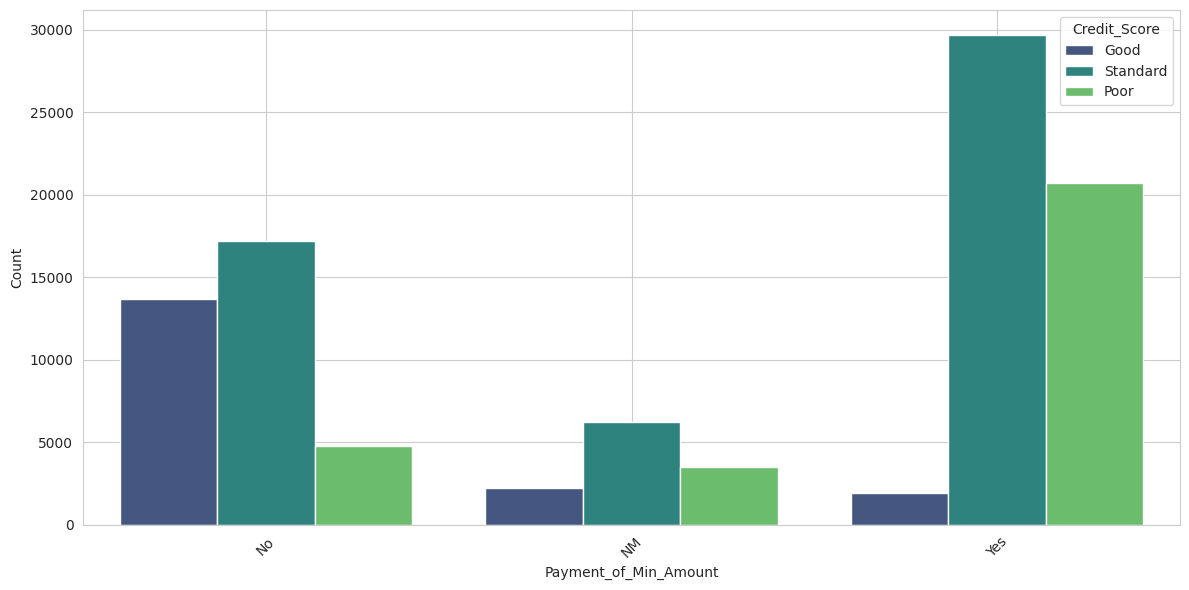

In [75]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', data=df, 
              palette="viridis")
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score')
plt.grid(True)
plt.tight_layout()
plt.show()

## 13. Amount_invested_monthly

In [76]:
non_numeric_values(df, 'Amount_invested_monthly')

{'.', 'nan'}

In [77]:
df['Amount_invested_monthly'].value_counts()

Amount_invested_monthly
10000                 4305
0.0                    169
59.93725850034815        1
165.180659491917         1
62.030802602004044       1
                      ... 
109.296681189146         1
33.6098814431885         1
76.87001005130772        1
908.6939096189257        1
401.35900899207513       1
Name: count, Length: 91049, dtype: int64

In [78]:
df['Amount_invested_monthly'].isna().sum()

4479

In [79]:
df['Amount_invested_monthly'] = df.groupby(
    'Customer_ID')['Amount_invested_monthly'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

In [80]:
df['Amount_invested_monthly'].isnull().sum()

0

## 14. Payment_Behaviour

In [81]:
non_numeric_values(df, 'Payment_Behaviour')

{'!@',
 '#%',
 'HighspentLargevaluepayments',
 'HighspentMediumvaluepayments',
 'HighspentSmallvaluepayments',
 'LowspentLargevaluepayments',
 'LowspentMediumvaluepayments',
 'LowspentSmallvaluepayments'}

In [82]:
# Replace '!@9#%8' with NaN

df['Payment_Behaviour'].replace('!@9#%8', pd.NA, inplace=True)

# fill missing values with mode

mode_value = df['Payment_Behaviour'].mode()[0]
df['Payment_Behaviour'].fillna(mode_value, inplace=True)

In [83]:
df.Payment_Behaviour.value_counts()

Payment_Behaviour
LowspentSmallvaluepayments      33113
HighspentMediumvaluepayments    17540
LowspentMediumvaluepayments     13861
HighspentLargevaluepayments     13721
HighspentSmallvaluepayments     11340
LowspentLargevaluepayments      10425
Name: count, dtype: int64

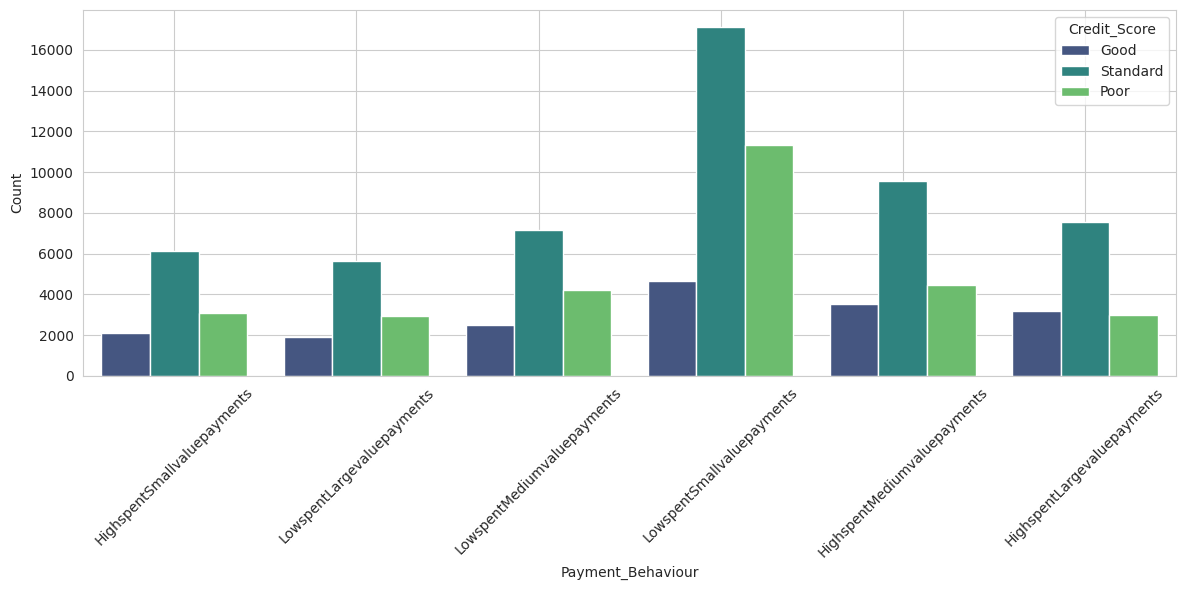

In [84]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=df, 
              palette="viridis")
plt.xlabel('Payment_Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Lowspent', 'Low_spent_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Highspent', 'High_spent_')

df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Smallvalue', 'Small_value_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Largevalue', 'Large_value_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Mediumvalue', 'Medium_value_')

df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      33113
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64

In [86]:
df['Payment_Behaviour'].isna().sum()

0

## 16. Monthly_Balance

In [87]:
non_numeric_values(df, 'Monthly_Balance')

{'-', '.', 'nan'}

In [88]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype(str)

df['Monthly_Balance'] = df['Monthly_Balance'].str.replace(r'[^0-9.-]+', '').str.replace('-', '')

In [89]:
df.Monthly_Balance.isna().sum()

0

In [90]:
df['Monthly_Balance'].value_counts(ascending=True)

Monthly_Balance
281.88431224337995                1
254.9709216273975                 1
250.0931678204641                 1
289.7550752754317                 1
260.625831704352                  1
                               ... 
376.7024623690405                 1
321.2336043357731                 1
373.29270287694055                1
333333333333333333333333333       9
nan                            1200
Name: count, Length: 98793, dtype: int64

In [91]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

median_value = df['Monthly_Balance'].median()

df['Monthly_Balance'].fillna(median_value, inplace=True)

In [92]:
df['Monthly_Balance'].isna().sum()

0

## 17. Monthly_Inhand_Salary

In [93]:
non_numeric_values(df, 'Monthly_Inhand_Salary')

{'.', 'nan'}

In [94]:
mode_monthlysalary = df.groupby('Customer_ID')[
    'Monthly_Inhand_Salary'].transform(lambda x: x.mode().iloc[0])

df['Monthly_Inhand_Salary'].fillna(mode_monthlysalary, inplace=True)

In [95]:
df['Monthly_Inhand_Salary'].isna().sum()

0

## 18. Drop unnecessary columns

In [96]:
# dropping unnecessary columns for modelling

df = df.drop([
    "ID", "Customer_ID", "Name", "SSN", "Type_of_Loan", "Month"], axis=1)

df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,...,Good,809.98,26.822620,No,49.574949,118.28022162236736,High_spent_Small_value_payments,312.494089,Good,265
1,23.0,Scientist,19114.12,1824.843333,3,4,3,4,1,1.0,...,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.629162,Good,265
2,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,...,Good,809.98,28.609352,No,49.574949,118.28022162236736,Low_spent_Medium_value_payments,331.209863,Good,267
3,23.0,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,...,Good,809.98,31.377862,No,49.574949,118.28022162236736,Low_spent_Small_value_payments,223.451310,Good,268
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4,6,1.0,...,Good,809.98,24.797347,No,49.574949,118.28022162236736,High_spent_Medium_value_payments,341.489231,Good,269


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        100000 non-null  float64
 1   Occupation                 100000 non-null  object 
 2   Annual_Income              100000 non-null  object 
 3   Monthly_Inhand_Salary      100000 non-null  float64
 4   Num_Bank_Accounts          100000 non-null  int64  
 5   Num_Credit_Card            100000 non-null  int64  
 6   Interest_Rate              100000 non-null  int64  
 7   Num_of_Loan                100000 non-null  int64  
 8   Delay_from_due_date        100000 non-null  int64  
 9   Num_of_Delayed_Payment     100000 non-null  float64
 10  Changed_Credit_Limit       100000 non-null  float64
 11  Num_Credit_Inquiries       100000 non-null  float64
 12  Credit_Mix                 100000 non-null  object 
 13  Outstanding_Debt           100

In [98]:
# change types

columns_to_convert = ['Annual_Income', 'Outstanding_Debt', 'Amount_invested_monthly']
for col in columns_to_convert:
    df[col] = df[col].str.replace('_', '').astype(float)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        100000 non-null  float64
 1   Occupation                 100000 non-null  object 
 2   Annual_Income              100000 non-null  float64
 3   Monthly_Inhand_Salary      100000 non-null  float64
 4   Num_Bank_Accounts          100000 non-null  int64  
 5   Num_Credit_Card            100000 non-null  int64  
 6   Interest_Rate              100000 non-null  int64  
 7   Num_of_Loan                100000 non-null  int64  
 8   Delay_from_due_date        100000 non-null  int64  
 9   Num_of_Delayed_Payment     100000 non-null  float64
 10  Changed_Credit_Limit       100000 non-null  float64
 11  Num_Credit_Inquiries       100000 non-null  float64
 12  Credit_Mix                 100000 non-null  object 
 13  Outstanding_Debt           100

In [100]:
# set target column location

Credit_Score = df.pop('Credit_Score')
df['Credit_Score'] = Credit_Score

In [101]:
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Months,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,...,Good,809.98,26.822620,No,49.574949,118.280222,High_spent_Small_value_payments,312.494089,265,Good
1,23.0,Scientist,19114.12,1824.843333,3,4,3,4,1,1.0,...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,265,Good
2,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,...,Good,809.98,28.609352,No,49.574949,118.280222,Low_spent_Medium_value_payments,331.209863,267,Good
3,23.0,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,...,Good,809.98,31.377862,No,49.574949,118.280222,Low_spent_Small_value_payments,223.451310,268,Good
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4,6,1.0,...,Good,809.98,24.797347,No,49.574949,118.280222,High_spent_Medium_value_payments,341.489231,269,Good


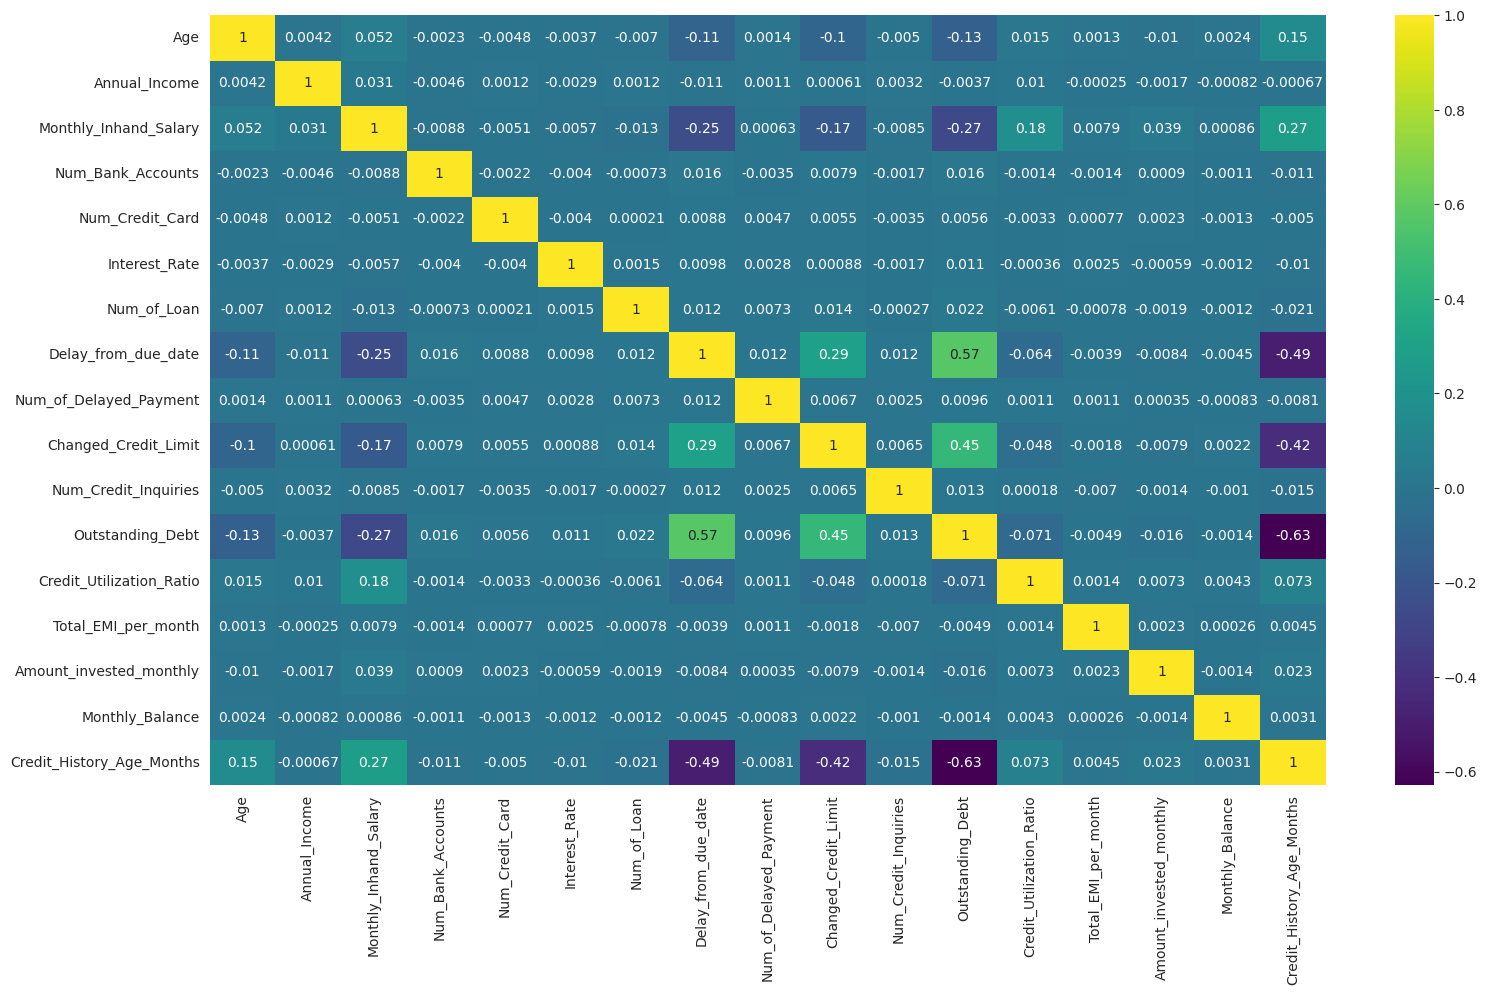

In [102]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), 
            annot = True, cmap="viridis");

## 19. Outliers 

In [103]:
# outlier deletion
df_num = df.select_dtypes(include='number')
for column in df_num.columns:
    for i in df["Credit_Score"].unique():
        selected_i = df[df["Credit_Score"] == i]
        selected_column = selected_i[column]
        
        std = selected_column.std()
        mean= selected_column.mean()
        
        max = mean + (4 * std)
        min =  mean - (4 * std)
        
        outliers = selected_column[((selected_i[column] > max) | (selected_i[column] < min))].index
        df.drop(index=outliers, inplace=True)
        print(column, i, outliers)

Age Good Index([ 1130,  6005, 10314, 10438, 13034, 23704, 28718, 31217, 34967, 51866,
       61535, 73535, 84261, 99197],
      dtype='int64')
Age Standard Index([ 1654,  4687,  5051,  5052,  5053,  5054,  5055,  8549,  8788, 10431,
       ...
       93237, 94475, 94945, 95620, 96630, 96689, 97667, 99320, 99512, 99776],
      dtype='int64', length=123)
Age Poor Index([   56,  2102,  2902,  4520,  4777,  5048,  5049,  5050,  6532,  6684,
       ...
       91508, 91509, 91511, 92520, 93534, 95513, 95807, 96320, 99012, 99738],
      dtype='int64', length=143)
Annual_Income Good Index([   54,   564,   895,  2684,  3390,  4453,  5254,  5647,  6767,  7420,
       ...
       88289, 88708, 90303, 91686, 93073, 94278, 94336, 96155, 98445, 99264],
      dtype='int64', length=129)
Annual_Income Standard Index([  231,   361,   368,   602,   617,  1253,  1737,  2099,  2303,  2815,
       ...
       98478, 98864, 99107, 99191, 99260, 99280, 99714, 99721, 99882, 99945],
      dtype='int64', length=43

In [104]:
df.shape

(91096, 22)

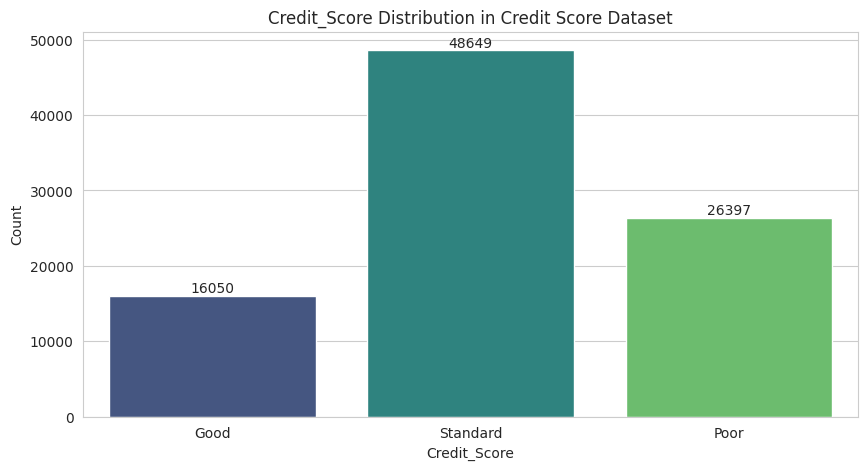

In [105]:
# Distribution of target variable

plt.figure(figsize=(10, 5))
ax=sns.countplot(data=df, x='Credit_Score', palette="viridis")
ax.bar_label(ax.containers[0])
plt.title('Credit_Score Distribution in Credit Score Dataset')
plt.xlabel('Credit_Score')
plt.ylabel('Count')
plt.show()

# Save and read clean data

In [106]:
df.to_csv("Credit_Score_train_cleaned.csv", index=False)

In [107]:
df = pd.read_csv("/kaggle/working/Credit_Score_train_cleaned.csv")
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Months,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,...,Good,809.98,26.822620,No,49.574949,118.280222,High_spent_Small_value_payments,312.494089,265,Good
1,23.0,Scientist,19114.12,1824.843333,3,4,3,4,1,1.0,...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,265,Good
2,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,...,Good,809.98,28.609352,No,49.574949,118.280222,Low_spent_Medium_value_payments,331.209863,267,Good
3,23.0,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,...,Good,809.98,31.377862,No,49.574949,118.280222,Low_spent_Small_value_payments,223.451310,268,Good
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4,6,1.0,...,Good,809.98,24.797347,No,49.574949,118.280222,High_spent_Medium_value_payments,341.489231,269,Good


# Model Processing

## 1. LabelEncoding for output column

In [108]:
df["Credit_Score"] = LabelEncoder().fit_transform(df["Credit_Score"])
df["Credit_Score"]

0        0
1        0
2        0
3        0
4        0
        ..
91091    1
91092    1
91093    1
91094    2
91095    1
Name: Credit_Score, Length: 91096, dtype: int64

In [109]:
df["Credit_Score"].value_counts()

Credit_Score
2    48649
1    26397
0    16050
Name: count, dtype: int64

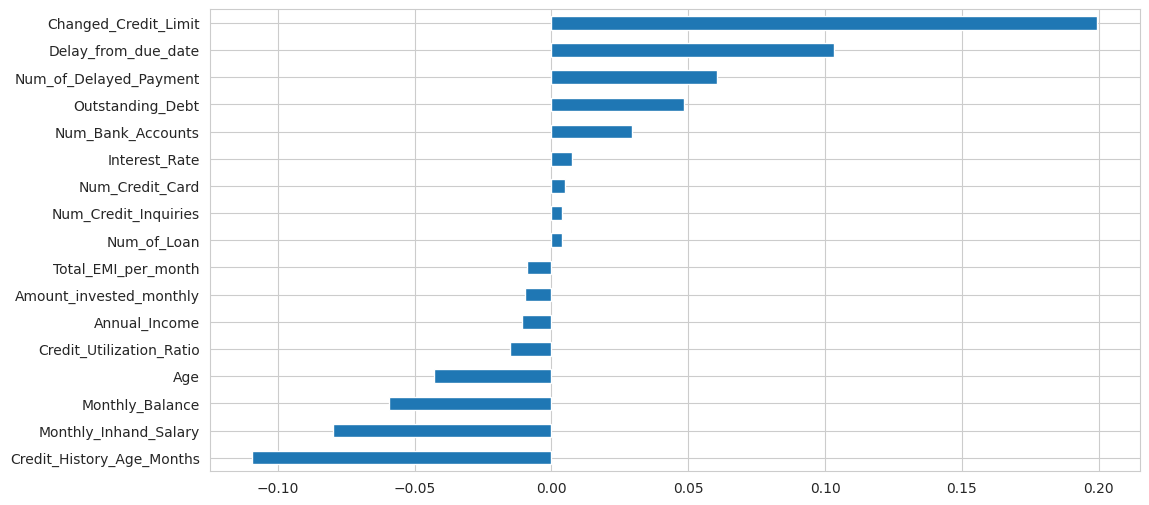

In [110]:
# Correlation of target variable with features after numerical transformation 
numerical_df = df.select_dtypes(include=[np.number])

correlation_series = numerical_df.corr()['Credit_Score'][:-1].sort_values()
correlation_series.plot.barh();

## 2. Encoding for categorical columns¶

In [111]:
# select columns of type 'object'

df.select_dtypes(include=['object']).columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')

In [112]:
payment_behaviour_categories = ['Low_spent_Small_value_payments',
                                'Low_spent_Medium_value_payments',
                                'Low_spent_Large_value_payments',
                                'High_spent_Small_value_payments',
                                'High_spent_Medium_value_payments',
                                'High_spent_Large_value_payments']

payment_behaviour_encoder = OrdinalEncoder(categories=[payment_behaviour_categories])

df['Payment_Behaviour'] = payment_behaviour_encoder.fit_transform(df[['Payment_Behaviour']])

In [113]:
label_encoder = OrdinalEncoder()
df['Credit_Mix'] = label_encoder.fit_transform(df[['Credit_Mix']])

In [114]:
label_encoder = LabelEncoder()
df['Payment_of_Min_Amount'] = label_encoder.fit_transform(df['Payment_of_Min_Amount'])

In [115]:
label_encoder = LabelEncoder()
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])

In [116]:
df.shape

(91096, 22)

## 3. Smote

In [117]:
# Separate properties and target variable

X = df.drop("Credit_Score", axis=1)
y = df.Credit_Score

In [118]:
y.value_counts(normalize=True) # unbalanced data

Credit_Score
2    0.534041
1    0.289771
0    0.176188
Name: proportion, dtype: float64

In [119]:
# make smote for unbalanced data
smote = SMOTE()
X, y = smote.fit_resample(X,y)

In [120]:
y.value_counts()

Credit_Score
0    48649
2    48649
1    48649
Name: count, dtype: int64

## 4. Train-Test Split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,
                                                    stratify=y, random_state=42)

In [122]:
df["Credit_Score"].value_counts()

Credit_Score
2    48649
1    26397
0    16050
Name: count, dtype: int64

In [123]:
y_train.value_counts()

Credit_Score
0    41352
1    41351
2    41351
Name: count, dtype: int64

### Normalization

In [124]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)
    
    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 5. ANN Model

In [ ]:
model_batchN = Sequential([
    Dense(512, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'), 
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(3, activation='softmax')
])
model_batchN.compile(optimizer = Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=70,
                               restore_best_weights=True)

model_batchN.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          validation_split=0.1,
          batch_size=512,
          epochs=800,
          verbose=1,
          callbacks=[early_stopping])

Epoch 1/800


I0000 00:00:1736431802.270889     116 service.cc:145] XLA service 0x7ec770013f90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736431802.270942     116 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1736431802.270946     116 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 47/243 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4996 - loss: 1.2896

I0000 00:00:1736431812.563423     116 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_slice_fusion_1', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1736431812.578225     116 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6021 - loss: 1.0174

I0000 00:00:1736431822.896768     116 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_slice_fusion_1', 8 bytes spill stores, 8 bytes spill loads



243/243 ━━━━━━━━━━━━━━━━━━━━ 25s 47ms/step - accuracy: 0.6023 - loss: 1.0168 - val_accuracy: 0.6951 - val_loss: 0.7367
Epoch 2/800
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7116 - loss: 0.7453 - val_accuracy: 0.7279 - val_loss: 0.6831
Epoch 3/800
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7239 - loss: 0.7093 - val_accuracy: 0.7338 - val_loss: 0.6690
Epoch 4/800
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7304 - loss: 0.6841 - val_accuracy: 0.7392 - val_loss: 0.6545
Epoch 5/800
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7331 - loss: 0.6748 - val_accuracy: 0.7406 - val_loss: 0.6439
Epoch 6/800
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7353 - loss: 0.6618 - val_accuracy: 0.7418 - val_loss: 0.6408
Epoch 7/800
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7383 - loss: 0.6541 - val_accuracy: 0.7447 - val_loss: 0.6317
Epoch 8/800
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7403 - loss: 0.6471 - val_accuracy: 0.74

In [ ]:
model_batchN.evaluate(X_train, y_train)

In [ ]:
eval_metric(model_batchN, X_train, y_train, X_test, y_test)

# Final Model and Model Deployment

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
scaler = StandardScaler().fit(X)

In [ ]:
# Save StandardScaler 

pickle.dump(scaler, open("scaler_credit_score", 'wb'))

In [ ]:
X_scaled = scaler.transform(X)

In [ ]:
final_model = Sequential([
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'), 
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(3, activation='softmax')
])
final_model.compile(optimizer = Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

final_model.fit(x=X_scaled, y=y, batch_size=512, epochs=650)

In [ ]:
# Save Model

final_model.save('final_model_ANN_credit_score.h5')

# Test Data Cleaning and Preparing

In [ ]:
df2 = pd.read_csv("/kaggle/input/credit-score-classification/test.csv")
df2.head()

In [ ]:
df2 = df2.replace("_", "", regex=True)
df2[df2.eq('').any(axis=1)]

In [ ]:
empty_values = df2[df2.eq('').any(axis=1)]

# Fill empty values with np.nan 

df2.loc[empty_values.index] = df2.loc[empty_values.index].replace('', np.nan)

In [ ]:
df2= df2.dropna()

In [ ]:
df2.isna().sum()

In [ ]:
df2.head()

In [ ]:
df2['Credit_History_Years'] = df2['Credit_History_Age'].str.extract(r'(\d+) Years').astype(int)
df2['Credit_History_Months'] = df2['Credit_History_Age'].str.extract(r'(\d+) Months').astype(int)

df2.drop(columns=['Credit_History_Age'], inplace=True)

df2.head()

In [ ]:
# Convert years to months and add with months to get total months

df2['Credit_History_Age_Months'] = df2['Credit_History_Years'] * 12 + df2['Credit_History_Months']

# Drop the 'Credit_History_Years' and 'Credit_History_Months' columns

df2.drop(columns=['Credit_History_Years', 'Credit_History_Months'], inplace=True)

df2.head()

In [ ]:
# Replace '!@9#%8' with NaN

df2['Payment_Behaviour'].replace('!@9#%8', pd.NA, inplace=True)

# Impute missing values with mode

mode_value = df2['Payment_Behaviour'].mode()[0]
df2['Payment_Behaviour'].fillna(mode_value, inplace=True)

In [ ]:
df2['Payment_Behaviour'] = df2['Payment_Behaviour'].str.replace('Lowspent', 'Low_spent_')
df2['Payment_Behaviour'] = df2['Payment_Behaviour'].str.replace('Highspent', 'High_spent_')

df2['Payment_Behaviour'] = df2['Payment_Behaviour'].str.replace('Smallvalue', 'Small_value_')
df2['Payment_Behaviour'] = df2['Payment_Behaviour'].str.replace('Largevalue', 'Large_value_')
df2['Payment_Behaviour'] = df2['Payment_Behaviour'].str.replace('Mediumvalue', 'Medium_value_')

df2['Payment_Behaviour'].value_counts()

In [ ]:
# dropping unnecessary columns for modelling

df2 = df2.drop([
    "ID", "Customer_ID", "Name", "SSN", "Type_of_Loan", "Month"], axis=1)

df2.head()

In [ ]:
columns_to_convert = ['Annual_Income', 'Outstanding_Debt', 'Amount_invested_monthly']
for col in columns_to_convert:
    df2[col] = df2[col].str.replace('_', '').astype(float)

## Encoding for categorical columns¶

In [ ]:
# select columns of type 'object'

df2.select_dtypes(include=['object']).columns

In [ ]:
payment_behaviour_categories = ['Low_spent_Small_value_payments',
                                'Low_spent_Medium_value_payments',
                                'Low_spent_Large_value_payments',
                                'High_spent_Small_value_payments',
                                'High_spent_Medium_value_payments',
                                'High_spent_Large_value_payments']

payment_behaviour_encoder = OrdinalEncoder(categories=[payment_behaviour_categories])

df2['Payment_Behaviour'] = payment_behaviour_encoder.fit_transform(df2[['Payment_Behaviour']])

In [ ]:
label_encoder = OrdinalEncoder()
df2['Credit_Mix'] = label_encoder.fit_transform(df2[['Credit_Mix']])

In [ ]:
label_encoder = LabelEncoder()
df2['Payment_of_Min_Amount'] = label_encoder.fit_transform(
    df2['Payment_of_Min_Amount'])

In [ ]:
label_encoder = LabelEncoder()
df2['Occupation'] = label_encoder.fit_transform(df2['Occupation'])

# Prediction from Final Model 

In [ ]:
scaler_credit = pickle.load(open("/kaggle/working/scaler_credit_score", "rb"))

In [ ]:
df_test_scaled = scaler_credit.transform(df2)
df_test_scaled

In [ ]:
# Load Model

from tensorflow.keras.models import load_model
final_model = load_model('/kaggle/working/final_model_ANN_credit_score.h5')

In [ ]:
final_model.predict(df_test_scaled)

In [ ]:
y_pred_probabilities = final_model.predict(df_test_scaled)
y_pred = y_pred_probabilities.argmax(axis=1)

In [ ]:
df2["pred"] = y_pred
df2.sample(5)

In [ ]:
predictions = final_model.predict(df_test_scaled)

normalized_predictions = tf.nn.softmax(predictions, axis=-1).numpy()

In [ ]:
normalized_predictions

In [ ]:
df["Credit_Score"].value_counts()

In [ ]:
df2["pred"] = df2["pred"].map({0 : "Good",1 : "Poor" , 2 : "Standard"})

In [ ]:
df2["pred_proba_good"] = normalized_predictions[:,0]
df2["pred_proba_poor"] = normalized_predictions[:,1]
df2["pred_proba_standard"] = normalized_predictions[:,2]
df2.sample(5).iloc[:,-4:]